# Report machine learning project : football match prediction
**Authors**: Arradi Naoufal, Bienfait Méo, Bouchakour Younes, Sergent Pierre-Louis, Tadjer Badr

https://github.com/PLsergent/football_match_prediction

**Table of content**

- [1. Subject](#1-subject)
- [2. Dataset](#2-dataset)
    - [2.1 Columns](#21-columns)
    - [2.2 Game stats pre processing](#22-game-stats-pre-processing)
    - [2.3 Collecting data](#23-collecting-data)

- [3. Model training](#3-model-training)
  - [3.1 Pre processing](#31-pre-processing)
  - [3.2 Logistic Regression](#32-logistic-regression)
  - [3.3 Other models](#33-others-models)
  - [3.4 PCA](#34-pca)

- [4. An other approach: binary classification](#4-an-other-approach-binary-classification)
  - [4.1 Confusion matrix, evaluation](#41-confusion-matrix-evaluation)
  - [4.2 Dataset modification](#42-dataset-modification)
  - [4.3 Logistic Regression(2)](#43-logistic-regression2)

- [5. Features importance](#5-features-importance)

- [6. Final thoughts, conclusion](#6-final-thoughts-conclusion)



## 1. Subject

For our machine learning class we had to do a project. We decided to choose a subject that was interesting for everyone, since the majority of our group was into football we decided to find a problematic around this topic.

The two ideas were:
- predicting future football games results
- predicting football games results based on stats

The first subject appeared to be more complicated, both in terms of data gathering with different type of data (form of players, games roasters, previous game stats) and data analysis with several dataset to train.

Thereby we chose the second topic. The idea would be to use supervised algorithms with game stats of passed matches, and then try to determine the winners/losers of other games. We could then assess which metric has the most influence on the results and **establish the best scenario to win a football game**.

## 2. Dataset

After looking for datasets online we thought it would be more useful to use an API instead. This way we have more control on our data and we could also extend our dataset at will by adding more stats.

For this project we used the API of [Sportmonks](https://www.sportmonks.com/) as it provided the necessary stats with enough free calls per hour (180) to play around with the data. The code written to extract the data from the API is accessible in [this files](https://github.com/PLsergent/football_match_prediction/blob/main/sport_monks_api.py).

Therefore we can use the class `SportmonksAPI(season_id: int, league_id: int)` that will get individually every game stats for a given season and league. The attribute `rows_data` will then contain a list of list of game stats.

### 2.1 Columns

**Shots**:
- total
- ongoal
- offgoal
- insidebox
- outsidebox

**Passes**:
- total
- percentage(of completed pass)

**Attacks**:
- total
- dangerous

**Others**:
- Fouls
- Corners
- Possession_time
- Yellow_cards
- Red_cards
- Saves
- Substitutions
- Tackles
- Penalties
- Injuries

**Output**: win = 1, draw = 0, loss = -1

### 2.2 Game stats pre processing

*Included in the python code.*

In order to have relevant data for our model, we will get all the stats for every game in a season, and then we will compare the two teams of each match by subtracting their stats to one another. Hence we can keep track of the dominance of each team in specific areas. Indeed we thought that the stats themselves would not be sufficient to train our model as we would lose the sense of "confrontation" between two teams. A team could win a game with 400 passes but lose the next game with the same amount of passes. A stat is relevant only when compared to the opposing team.

So **each line** of our dataset represent in reality **the team stats minus the opposing team stats for this game**.

**Example**:
||round|passes|shots|attacks|penalties|red_cards|output|
|-|-|-|-|-|-|-|-|
|team a|1|200|3|10|0|0|1|
|team b|1|-200|-3|-10|0|0|-1|

Here the *team a* did 200 **more** passes than his opponent, and had 3 **more** shots.
The *team b* did 200 **less** passes than his opponent, and had 3 **less** shots.

### 2.3 Collecting data

In [1]:
# Collect data from API

import pandas as pd
from sport_monks_api import SportmonksAPI

data2020_2021_scot = SportmonksAPI(season_id=17141).rows_data
data2020_2021_dan = SportmonksAPI(season_id=17328, league_id=271).rows_data
data2019_2020_dan = SportmonksAPI(season_id=16020, league_id=271).rows_data

data = data2020_2021_scot + data2020_2021_dan + data2019_2020_dan


# Create dataframe

columns = ["team_ids", "round_ids", "shots_total", "shots_ongoal", "shots_offgoal", "shots_insidebox", "shots_outsidebox",
"passes_total", "passes_percentage", "attacks_total", "attacks_dangerous", "fouls", "corners",
"possession_time", "yellow_cards", "red_cards", "saves", "substitutions", "tackles", "penalties", "injuries", "results"]

df = pd.DataFrame(data=data, columns=columns)


# Export to .csv

df.to_csv("./data/data_extended.csv")

df

Api call: page1 for rounds/season/17141
Api call: page1 for fixtures/between/2020-08-01/2021-05-16
Api call: page2 for fixtures/between/2020-08-01/2021-05-16
Api call: page3 for fixtures/between/2020-08-01/2021-05-16
Api call: page1 for rounds/season/17328
Api call: page1 for fixtures/between/2020-09-11/2021-05-24
Api call: page2 for fixtures/between/2020-09-11/2021-05-24
Api call: page1 for rounds/season/16020
Api call: page1 for fixtures/between/2019-07-12/2020-07-08
Api call: page2 for fixtures/between/2019-07-12/2020-07-08
Api call: page3 for fixtures/between/2019-07-12/2020-07-08


,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,NaN,NaN,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,NaN,NaN,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,NaN,2.0,-1.0,-6.0,NaN,NaN,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,NaN,-2.0,1.0,6.0,NaN,NaN,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,NaN,0.0,0.0,-2.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1703,194388,-16,-4.0,-12.0,-10.0,-3.0,-289.0,-21.21,-55.0,...,-8.0,-38,NaN,NaN,2.0,1.0,1.0,NaN,1.0,-1
1278,1789,194388,-9,-4.0,-5.0,-6.0,-3.0,-264.0,-9.16,-31.0,...,-6.0,-28,0.0,NaN,2.0,-1.0,8.0,NaN,1.0,-1
1279,86,194388,9,4.0,5.0,6.0,3.0,264.0,9.16,31.0,...,6.0,28,0.0,NaN,-2.0,1.0,-8.0,NaN,-1.0,1
1280,2650,194388,1,-1.0,2.0,7.0,-3.0,-65.0,-4.16,10.0,...,-1.0,-10,NaN,NaN,0.0,1.0,-4.0,1.0,2.0,0


## 3. Model training

*During our work we first used a dataframe with a shape of (456, 22), equivalent to a full season of 228 games. It appeared along the way that we needed more data. We then fetched 3 seasons resulting in a dataframe of 1282 rows, i.e. 641 games. The results were not significantly better with the second "extended" dataset but we will present our work based on this one as we mostly used it.*

### 3.1 Pre processing

As we created the dataset ourself the data cleaning was pretty straight forward. We had some null values but we knew that a null value could be replaced by 0 since it just meant that the stat didn't occur during the game. On the other hand, according to the way we build our dataset, the mean of the data of each column would be 0 anyway.

Also, as we had only numerical values we didn't have to convert any values.

In [2]:
df.fillna(0, inplace=True)
df.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

We also wrote a function that allow us to see the repartition of the outcome of the games.

             total  percentage
results                       
draw           154        24.0
win_or_loss    487        76.0

Total games: 641.0


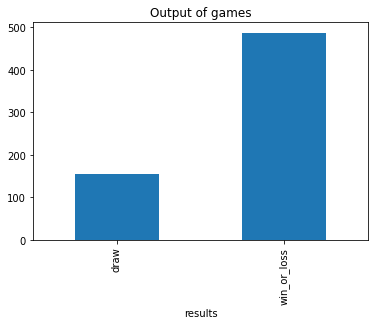

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def game_output_results(df_in=df):
    df = pd.DataFrame()
    df["total"] = df_in.groupby("results").size()

    df.drop(index=-1, inplace=True)
    df.rename(index={0: "draw", 1: "win_or_loss"}, inplace=True)

    df.iloc[0]["total"] = df.iloc[0]["total"]/2

    df["percentage"] = round(df["total"] / (df_in.shape[0]//2) * 100)

    print(f"{df}\n")
    print(f"Total games: {df_in.shape[0]/2}")

    df["total"].plot(kind="bar", title="Output of games")
    plt.show()

game_output_results()

We can see that we have 154 draw games and 487 decisive games (with a winner). We have significantly less draw games.

*We actually tried to extend our data by duplicating draw games rows in order to have the same amount of draw/win or loss. But it didn't really improve our model so we will not mention it in details.*

We can then define our predictors. Note that after a few tries we remove the following columns `{"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}` since we thought they wouldn't bring any value to the prediction.

In [4]:
predictors = df.columns[2:-1]
col_to_remove = {"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}
predictors = list(set(predictors) - col_to_remove)
print(sorted(predictors))

['attacks_dangerous', 'attacks_total', 'corners', 'passes_percentage', 'passes_total', 'penalties', 'possession_time', 'red_cards', 'saves', 'shots_insidebox', 'shots_offgoal', 'shots_ongoal', 'shots_outsidebox', 'shots_total']


### 3.2 Logistic Regression

We then proceed to train our dataset, first with the Logistic Regression algorithm. Nothing particular here, despite the fact that we had to change the solver to `newton-cg` in order to support multiclass classification and also the multi_class parameter to `multinomial`.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df["results"])
x = pd.DataFrame(data=df[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

clf = LogisticRegression(random_state=1, solver="newton-cg", multi_class="multinomial")
clf.fit(X_train, y_train.values.ravel())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)
train accuracy = 0.6633221850613155
test accuracy = 0.6571428571428571


We have a test accuracy of 65% which is pretty low, although it's not that bad considering that a random algorithm would get around 33%. To confirm this result we used the cross validation.

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, df[predictors], df["results"], scoring='accuracy', cv=10)
print("Mean:", scores.mean())

Mean: 0.6551659399224806


We found roughly the same accuracy with 65%. At this point we wanted to try other algorithm to see if we could find a better accuracy. Also other models provide a `feature_importances_` attribute that could help use to determine the most important stat in a football game.

### 3.3 Others models

| Model                   | Train acc | Test acc | Feature importance                                       |
|-------------------------|-----------|----------|----------------------------------------------------------|
| Decision Tree           | 0.63      | 0.62     | shots_ongoal, saves                                      |
| Gradient Boosting       | 0.64      | 0.63     | shots_ongoal, saves                                      |
| K-nearest neighbors     | 0.49      | 0.45     | /                                                        |
| Random Forest           | 0.78      | 0.64     | shots_ongoal, shots_total, shots_insidebox, passes_total |
| Support-vector Machine  | 0.51      | 0.49     | /                                                        |

We can see that despite SVM and KNN we got similar result in term of accuracy.

*Note that we used GridSearch for Decision Tree, Gradient Boosting, and Random Forest algorithms. But for the purpose of the report we will not detail the code and give directly the parameters we found.*

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


clf_dt = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=25, min_samples_split=10)

clf_dt.fit(X_train, y_train.values.ravel())
print ('[Decision Tree] train accuracy =', clf_dt.score(X_train, y_train))
print ('[Decision Tree] test accuracy =', clf_dt.score(X_test, y_test), "\n")

##

clf_rf = RandomForestClassifier(random_state=1, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=40)

clf_rf.fit(X_train, y_train.values.ravel())
print ('[Random Forest] train accuracy =', clf_rf.score(X_train, y_train))
print ('[Random Forest] test accuracy =', clf_rf.score(X_test, y_test), "\n")

##

clf_gb = GradientBoostingClassifier(random_state=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

clf_gb.fit(X_train, y_train.values.ravel())
print ('[Gradient Boosting] train accuracy =', clf_gb.score(X_train, y_train))
print ('[Gradient Boosting] test accuracy =', clf_gb.score(X_test, y_test))

[Decision Tree] train accuracy = 0.6376811594202898
[Decision Tree] test accuracy = 0.6285714285714286 

[Random Forest] train accuracy = 0.7736900780379041
[Random Forest] test accuracy = 0.6363636363636364 

[Gradient Boosting] train accuracy = 0.6443701226309922
[Gradient Boosting] test accuracy = 0.6415584415584416


### 3.4 PCA

Since we got 65% accuracy among all the algorithm we finally tried to use the principal component analysis. The idea is to do a dimensional reduction in order to obtain lower-dimensional data while preserving as much of its relevancy.

*Note that during our research we used two methods to perform the PCA, we're going to present the easier one.*

We first need to standardize our dataset by removing the mean and scaling to unit variance. We'll use the sklearn class `StandardScaler`. The actual formula to apply is the following:

```
z = (x - u) / s
```

- z: standardized dataset
- x: dataset
- u: mean
- s: standard deviation

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

We can then use the class `PCA` also from sklearn library and pass the argument .95 in order to have enough principal components to reach a variance of 0.95. We can then fit and transform our train set.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_standard)

X_train_transformed = pca.transform(X_train_standard)
X_test_transformed = pca.transform(X_test_standard)

*See also method fit_transform() to do both above operation at once.*

We can then use the Logistic Regression with the transformed data.

In [10]:
clf_pca = LogisticRegression(random_state=1, solver='newton-cg', multi_class="multinomial")
clf_pca.fit(X_train_transformed, y_train.values.ravel())

print ('train accuracy =', clf_pca.score(X_train_transformed, y_train))
print ('test accuracy =', clf_pca.score(X_test_transformed, y_test))

train accuracy = 0.5696767001114827
test accuracy = 0.5922077922077922


To conclude on this topic we can see that the accuracy is not better maybe because our dataset is not well suited for a PCA. In our case we'll just keep using the normal dataset. 

## 4. An other approach: binary classification

### 4.1 Confusion matrix, evaluation

Let's we go back to our first [Logistic Regression](#logistic-regression) model. We found a test accuracy and cross validation score of 65%. In order to understand those results we'll build a confusion matrix.

Unlike the confusion matrix used for binary classification problems with *TP, FN, FP, TN*, we have here 3 columns and 3 rows. The rows represent the actual values and the columns the predicted values. Hence we can calculate the precision, recall and f1-score for each cell of our table.

Let's dive into the confusion matrix itself to explain it.

*We used seaborn heatmap to display the matrix, and homemade code to display the values in each cell.*

[[127  10  11]
 [ 57   5  34]
 [ 15   5 121]]
              precision    recall  f1-score   support

          -1       0.64      0.86      0.73       148
           0       0.25      0.05      0.09        96
           1       0.73      0.86      0.79       141

    accuracy                           0.66       385
   macro avg       0.54      0.59      0.54       385
weighted avg       0.57      0.66      0.59       385



[Text(0.5, 51.0, 'predicted'), Text(51.0, 0.5, 'actual')]

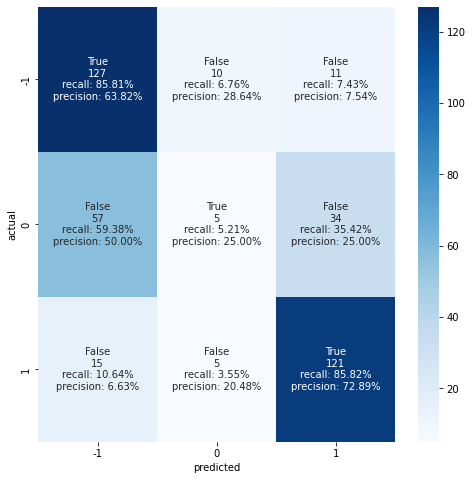

In [11]:
from sklearn import metrics
import seaborn as sns
import numpy as np

# predict class labels for the test set
y_pred = clf.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

print(metrics.classification_report(y_test, y_pred))

df_cm = pd.DataFrame(cf_matrix, index = [i for i in ["-1", "0", "1"]],
                  columns = [i for i in ["-1", "0", "1"]])

group_names = ["True", "False", "False", "False", "True", "False", "False", "False", "True"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

recalls = []
for values in cf_matrix:
	row = []
	for val in values:
		row.append(f"recall: {val/values.sum():.2%}")
	recalls += row

precisions = []
cf_vals = {}
for i, values in enumerate(cf_matrix):
	cf_vals[i] = values

for x, y, z in zip(cf_vals[0], cf_vals[1], cf_vals[2]):
	row = []
	values = [x, y, z]

	for val in values:
		row.append(f"precision: {val/sum(values):.2%}")
	precisions += row


labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in
          zip(group_names, group_counts, recalls, precisions)]

labels = np.asarray(labels).reshape(3,3)

fig, ax = plt.subplots(figsize=(8, 8))  
cf = sns.heatmap(df_cm, annot=labels, fmt="", cmap='Blues')
cf.set(xlabel="predicted", ylabel="actual")

So if we read the heatmap (first row) we can see that 127 loss predictions were right, although the model incorrectly predicted 10 loss games to be draws and 11 others to be wins.

Looking at the first column now, 127 loss predictions were right (as before), while 57 draw games were incorrectly predicted to be losses, and 15 wins were incorrectly predicted to be losses.

To summarize, if you take any cell of the table by reading the x-axis first, you can say:
> The model predicted {value} games to be {x-axis value}, while they were in reality {y-axis value}.

If you read the y-axis first you can say:
> {value} games that were {y-axis value}, were predicted to be {x-axis value} instead.

---

As you can understand the values on the diagonal represent the correct predictions. We can then find the precision, recall and f1-score.

|output |precision  |  recall | f1-score  | support|
|-------|-----------|---------|-----------|--------|
| -1    |   0.64    |  0.86   |   0.73    |   148  |
| 0     |   0.25    |  0.05   |   0.09    |    96  |
| 1     |   0.73    |  0.86   |   0.79    |   141  |

---

Based on this table we can clearly assess that the draw games are tough to predict for the algorithm.
We'll try to explain later why we think this result could be expected, but we can also say that the amount of draw games in our dataset is too low to have correct predictions.

Therefore the draw games are the reason why we have bad accuracy, that's why we decided to get rid of the draws in the dataset and make a binary classification with the outputs being win or loss. Since our goal is to establish the most important stats to win a football game we concluded that it was the best solution.

### 4.2 Dataset modification

As explained above we want to delete every row with a result equal to 0.

In [12]:
df_wo_draw = df.drop(df[df.results == 0].index)
print(df_wo_draw.shape)
df_wo_draw.loc[df_wo_draw["results"] == 0, "results"].sum()

(974, 22)


0

Now we only have wins: 1 or loses: -1, in our dataset.

### 4.3 Logistic Regression(2)

We then apply the Logistic Regression to our new dataset.

In [13]:
y = pd.DataFrame(data=df_wo_draw["results"])
x = pd.DataFrame(data=df_wo_draw[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121 )

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

clf_wo_draw = LogisticRegression(random_state=1, solver="liblinear")
clf_wo_draw.fit(X_train, y_train.values.ravel())

print ('train accuracy =', clf_wo_draw.score(X_train, y_train))
print ('test accuracy =', clf_wo_draw.score(X_test, y_test))

train shape (681, 14) (681, 1)
test shape (293, 14) (293, 1)
train accuracy = 0.8634361233480177
test accuracy = 0.8907849829351536


We now have very good results with almost 90% of test accuracy. Let's confirm those results by doing a cross validation. 

In [14]:
scores = cross_val_score(clf_wo_draw, df_wo_draw[predictors], df_wo_draw["results"], scoring='accuracy', cv=10)
print(scores)
print("Mean:", scores.mean())

[0.93877551 0.87755102 0.87755102 0.87755102 0.87628866 0.83505155
 0.72164948 0.78350515 0.90721649 0.88659794]
Mean: 0.8581737849779086


We find 85% of accuracy this way. Finally we'll display once again a confusion matrix.

              precision    recall  f1-score   support

          -1       0.92      0.87      0.89       150
           1       0.87      0.92      0.89       143

    accuracy                           0.89       293
   macro avg       0.89      0.89      0.89       293
weighted avg       0.89      0.89      0.89       293



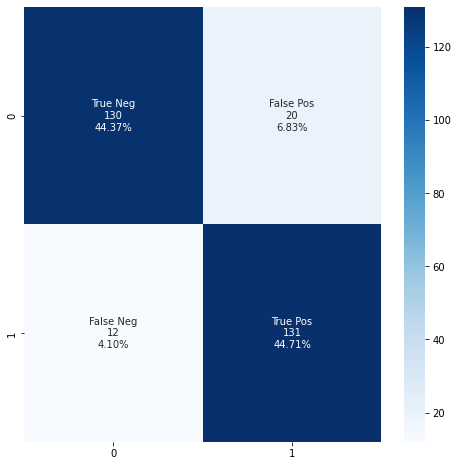

In [15]:
y_pred = clf_wo_draw.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)

group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
				
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
			
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(8, 8))  
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
print(metrics.classification_report(y_test, y_pred))

## 5. Features importance

To answer our problematic we figure out that it would be more relevant to use this new dataset without the draws since our goal is to find the best scenario to **win** a football game, based on stats.

Let's first re-run our algorithms with the new dataset (we slightly tuned the parameters manually).

In [16]:
clf_dt = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=20, min_samples_split=8)

clf_dt.fit(X_train, y_train.values.ravel())
print ('[Decision Tree] train accuracy =', clf_dt.score(X_train, y_train))
print ('[Decision Tree] test accuracy =', clf_dt.score(X_test, y_test), "\n")

##

clf_rf = RandomForestClassifier(random_state=1, max_depth=6, min_samples_leaf=20, min_samples_split=8, n_estimators=30)

clf_rf.fit(X_train, y_train.values.ravel())
print ('[Random Forest] train accuracy =', clf_rf.score(X_train, y_train))
print ('[Random Forest] test accuracy =', clf_rf.score(X_test, y_test), "\n")

##

clf_gb = GradientBoostingClassifier(random_state=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

clf_gb.fit(X_train, y_train.values.ravel())
print ('[Gradient Boosting] train accuracy =', clf_gb.score(X_train, y_train))
print ('[Gradient Boosting] test accuracy =', clf_gb.score(X_test, y_test))

[Decision Tree] train accuracy = 0.8223201174743024
[Decision Tree] test accuracy = 0.8327645051194539 

[Random Forest] train accuracy = 0.8091042584434655
[Random Forest] test accuracy = 0.8088737201365188 

[Gradient Boosting] train accuracy = 0.8399412628487518
[Gradient Boosting] test accuracy = 0.8191126279863481


And now lets use the parameter `feature_importances_` to display the most relevant features.

<AxesSubplot:title={'center':'Gradient Boosting'}>

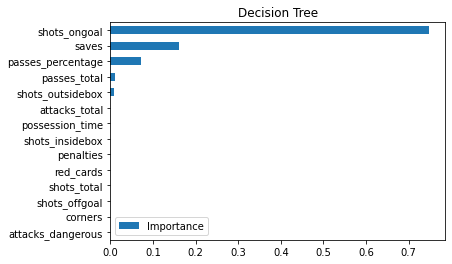

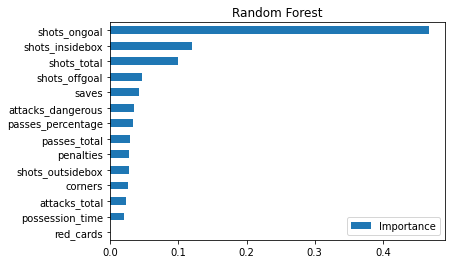

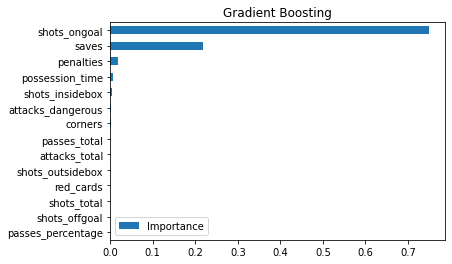

In [17]:
feat_imp_dt = pd.DataFrame(clf_dt.feature_importances_, predictors, columns=['Importance'])
feat_imp_dt.sort_values('Importance', ascending=True).plot(kind="barh", title="Decision Tree")

##

feat_imp_rf = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp_rf.sort_values('Importance', ascending=True).plot(kind="barh", title="Random Forest")

##

feat_imp_gb = pd.DataFrame(clf_gb.feature_importances_, predictors, columns=['Importance'])
feat_imp_gb.sort_values('Importance', ascending=True).plot(kind="barh", title="Gradient Boosting")

Let's also display the Logistic Regression coef importances.

<BarContainer object of 14 artists>

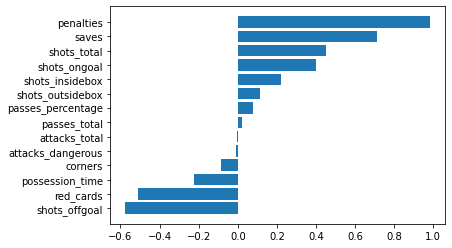

In [18]:
importances = clf_wo_draw.coef_[0]

# Create dictionnary
feature_importance = dict([(col, imp) for col, imp in zip(predictors, importances)])

# Sort by importance
sorted_keys = sorted(feature_importance, key=feature_importance.get)
sorted_feature_importance = {}

for key in sorted_keys:
    sorted_feature_importance[key] = feature_importance[key]

# plot feature importance
plt.barh(list(sorted_feature_importance.keys()), list(sorted_feature_importance.values()))

**Interpretation**

As we can see on the ***first three graphs***, **the shots on goal** are very important. This sounds logical since you need a shot on target in order to score a goal and the more on goal attempt you have, the most likely a team can succeed in scoring goals.

In ***two of the graphs*** the feature **saves** is second. This result is actually more surprising since this stat is usually overlooked. But if a team has many attempt on target and that the opposing goal keeper manages to stop all the shots then it makes sense to have this feature being considered important.

Concerning the ***Random Forest*** the feature saves is not considered as important, with **shots inside box**, **shots total** and **shots off goal** being placed higher. This again makes perfect sense since you have more chances to score while being closer to the goal and we can see that in general the shots statistics seem to be the most relevant ones.

If we look at the coefficient of the ***Logistic Regression*** it reveals the same important stats: saves, shots total, shots on goal and shot inside box. But here the feature **penalties** seems to have even more weight. And again it makes sense since you have much higher chances of winning a game if you have a penalty, at least the player would score a goal 80% of the time (sources: [here](https://www.researchgate.net/publication/308873835_A_Quantitative_Analysis_of_Penalty-Kicks_in_the_English_Premier_League#:~:text=A%20goal%20was%20scored%20in,%2C%20whereas%2020.5%25%20were%20unsuccessful.) and [here](https://blog.innerdrive.co.uk/sports/the-psychology-of-perfect-penalties#:~:text=Research%20shows%20that%20if%20a,the%20outcome%20of%20the%20match.)). We were actually quite surprised to not have this stat being pointed in the other graphs, and that might be because there is way less penalties shot per season compared to the other features.

On the other hands it seems that having more shots off goal and red cards will make you lose the game according to the last graph (Logistic Regression).

Stats to win:
- shots on goal
- saves
- shots in general
- penalties

---

**Results vs expected output**

The results are very interesting and reflect the believe we had about some stats importance (about the shots in particular). Some other were unexpected like the feature saves.

However we were expecting to find more weight in features about passes, they have not shown to be impactful for our models. Likewise for the penalties and red cards.

## 6. Final thoughts, conclusion

Football is not the most stats driven sport out there. A match outcome can be the result of a lot of different scenarios with luck, misfortune, unexpected game winning counter attack, penalties, etc... The winner can be decided on one good play or a nice free kick even if the team was behind the entire game. You can lead a match with many passes, shots on target, corners, dangerous attacks and still not be  able to score, which can result in a draw or a loss.

That's also why we think our multiclass classification didn't have a good accuracy. **A draw game often does not result in a close match statistically, most of the time the dominating team just didn't find a way to score (or to score more).** Football is one of the only sport where there is that many draw games, but mostly, matches are not close statistically. You can even have better stats and lose. That could never be possible in basketball for example.

When we switch to a binary classification we had way better results since decisive games had clearer stats that could show us the winner or loser. So we can access that having more shots on target, saves, other type of shots and penalties will most likely make you won the game.

To conclude, football is a sport exciting and beautiful to watch. The outcome of a game is always unpredictable and you cannot summarize it on a simple spreadsheet. You have to live it to get it.